In [219]:
import pandas as pd
import numpy as np
import os 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [220]:
from scipy import stats

In [221]:
from scipy.stats import f_oneway, kruskal

In [222]:
# os.chdir("...")

In [223]:
pwd = os.getcwd()

In [224]:
df = pd.read_csv(pwd + "\\2. Healthcare\\DAP2\\2. Dataset\\cleaned_dataset.csv")

In [225]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.28,328,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.10,205,Emergency,2022-10-07,Aspirin,Normal
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,458,Urgent,2022-10-09,Penicillin,Abnormal


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                50000 non-null  object 
 1   Age                 50000 non-null  int64  
 2   Gender              50000 non-null  object 
 3   Blood Type          50000 non-null  object 
 4   Medical Condition   50000 non-null  object 
 5   Date of Admission   50000 non-null  object 
 6   Doctor              50000 non-null  object 
 7   Hospital            50000 non-null  object 
 8   Insurance Provider  50000 non-null  object 
 9   Billing Amount      50000 non-null  float64
 10  Room Number         50000 non-null  int64  
 11  Admission Type      50000 non-null  object 
 12  Discharge Date      50000 non-null  object 
 13  Medication          50000 non-null  object 
 14  Test Results        50000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 5.7

### EDA Workflow: Hospital Admissions Dataset (cleaned_df)
**Domain**: Healthcare  
**Dataset**: 50,000 rows × 15 columns (Name, Age, Gender, Blood Type, Medical Condition, Date of Admission, Doctor, Hospital, Insurance Provider, Billing Amount, Room Number, Admission Type, Discharge Date, Medication, Test Results)  
**Status**: Cleaned, validated, analysis-ready  

#### 1. Univariate Analysis – Numerical Variables
**Variables**: Age, Billing Amount, Room Number, Length of Stay (derived)  
**Objective**: Profile distributions, skewness, outliers.

**Checklist**:
- Descriptive stats: mean, median, std, IQR, min/max
- Skewness/kurtosis calculations
- Log transform test (Billing Amount)
- Visuals: Histograms + KDE, Boxplots

**Log**: Central tendency, extremes (Age >120?).
**Pitfalls**: No mean-only for skewed data; Room Number = ID only.

#### 2. Univariate Analysis – Categorical Variables
**Variables**: Gender, Blood Type, Medical Condition, Admission Type, Insurance Provider, Medication, Test Results  
**Objective**: Frequencies, imbalances.

**Checklist**:
- Frequency counts + proportions
- Top/bottom-5 categories
- Imbalance flags (<5%)
- Visuals: Horizontal bar charts, Count plots

**Log**: Common/rare categories.
**Pitfalls**: No pie charts; check rare clinical categories.

#### 3. Temporal Analysis
**Derived**: Year, month, weekday from dates  
**Objective**: Trends/seasonality.

**Checklist**:
- Feature extraction (pd.to_datetime)
- Aggregations (counts/sums, normalized)
- Visuals: Line plots (over time), Boxplots (by period)

**Log**: Trends, seasonal spikes.
**Pitfalls**: Normalize volume; check partial years.

#### 4. Bivariate: Numerical vs Categorical
**Objective**: Category impacts on numerics.

**Checklist**:
- Grouped stats (mean/median)
- Tests: ANOVA/Kruskal-Wallis
- Visuals: Boxplots/violin, Bars + CI

**Log**: Key differences (e.g., Emergency costs).
**Pitfalls**: Check group sizes; no causation.

#### 5. Bivariate: Numerical vs Numerical
**Variables**: Age, Billing Amount, Room Number, Length of Stay  
**Objective**: Correlations.

**Checklist**:
- Pearson/Spearman matrices (p-values)
- Visuals: Scatter + trendlines, Heatmap

**Log**: Strongest pairs.
**Pitfalls**: Flag weak/non-linear; downsample scatters.

#### 6. Multivariate Analysis
**Objective**: Interactions (max 3 vars).

**Checklist**:
- Pivot tables/grouped means
- Visuals: Faceted boxplots, Grouped heatmaps

**Log**: High-cost segments.
**Pitfalls**: Limit dimensions; prioritize clarity.

#### 7. Target-Focused EDA
**Targets**: Billing Amount (regression); Admission Type/Test Results (classification)

**Regression Checklist**:
- Target distribution, heteroscedasticity
- Predictor-target boxplots

**Classification Checklist**:
- Imbalance metrics
- Feature separability

**Visuals**: Target plots, Pair plots (top features).
**Pitfalls**: No leakage; align w/ modeling.

#### 8. Insight Synthesis & Actions
**Checklist**:
- Key drivers/segments
- Translation table:

| Finding | Modeling | Business |
|---------|----------|----------|
| Cost drivers | Feature selection | Interventions |
| Imbalances | SMOTE | Negotiations |
| Trends | Time features | Forecasting |

- Executive summary (3-5 bullets)
**Final**: Outlier re-check; export notebook/dashboard.


---
---

#### 1. Univariate Analysis – Numerical Variables
**Variables**: Age, Billing Amount, Room Number, Length of Stay (derived)  
**Objective**: Profile distributions, skewness, outliers.

**Checklist**:
- Descriptive stats: mean, median, std, IQR, min/max
- Skewness/kurtosis calculations
- Log transform test (Billing Amount)
- Visuals: Histograms + KDE, Boxplots

**Log**: Central tendency, extremes (Age >120?).
**Pitfalls**: No mean-only for skewed data; Room Number = ID only.

In [227]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

In [228]:
df['Length of Stay'] = df['Discharge Date'] - df['Date of Admission']

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Name                50000 non-null  object         
 1   Age                 50000 non-null  int64          
 2   Gender              50000 non-null  object         
 3   Blood Type          50000 non-null  object         
 4   Medical Condition   50000 non-null  object         
 5   Date of Admission   50000 non-null  datetime64[ns] 
 6   Doctor              50000 non-null  object         
 7   Hospital            50000 non-null  object         
 8   Insurance Provider  50000 non-null  object         
 9   Billing Amount      50000 non-null  float64        
 10  Room Number         50000 non-null  int64          
 11  Admission Type      50000 non-null  object         
 12  Discharge Date      50000 non-null  datetime64[ns] 
 13  Medication          50000 non-n

In [230]:
df['Length of Stay (days)'] = df['Length of Stay'].dt.days

In [231]:
df.drop(columns='Length of Stay',inplace=True)

In [232]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length of Stay (days)
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.28,328,Urgent,2024-02-02,Paracetamol,Normal,2
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.10,205,Emergency,2022-10-07,Aspirin,Normal,15
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78,450,Elective,2020-12-18,Ibuprofen,Abnormal,30
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,458,Urgent,2022-10-09,Penicillin,Abnormal,20


In [233]:
num_cols = ['Age', 'Billing Amount', 'Room Number', 'Length of Stay (days)']

In [234]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,50000.0,51.580360,19.582194,18.00,35.0000,52.000,68.0000,85.00
Billing Amount,50000.0,25555.691533,14215.932245,-2008.49,13239.4075,25541.305,37853.9975,52764.28
Room Number,50000.0,301.032260,115.228819,101.00,202.0000,302.000,400.0000,500.00
Length of Stay (days),50000.0,15.500560,8.651385,1.00,8.0000,15.000,23.0000,30.00


In [235]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

iqr_df = pd.DataFrame({"Q1": Q1, "Q3": Q3, "IQR": IQR})
iqr_df


,Q1,Q3,IQR
Age,35.0000,68.0000,33.00
Billing Amount,13239.4075,37853.9975,24614.59
Room Number,202.0000,400.0000,198.00
Length of Stay (days),8.0000,23.0000,15.00


In [236]:
df[num_cols].agg(["skew", "kurtosis"]).T


,skew,kurtosis
Age,-0.006791,-1.192692
Billing Amount,-0.001583,-1.191352
Room Number,-0.010255,-1.192522
Length of Stay (days),0.003100,-1.202926


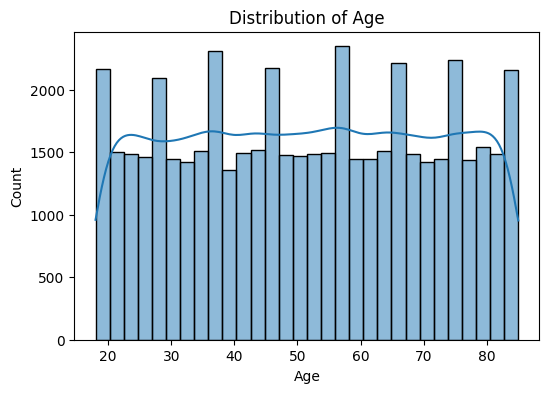

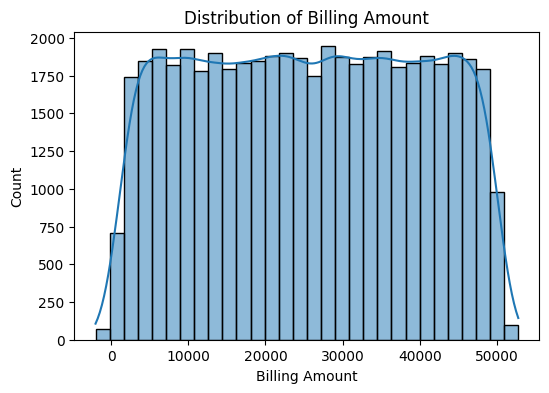

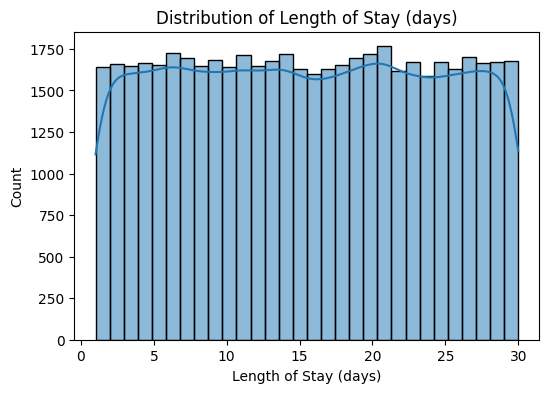

In [237]:


for col in ["Age", "Billing Amount", "Length of Stay (days)"]:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


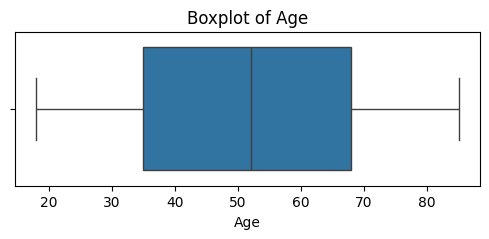

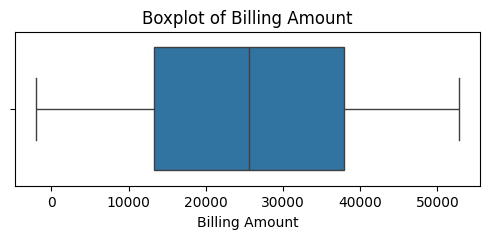

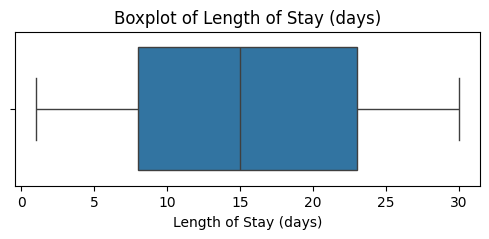

In [238]:
for col in ["Age", "Billing Amount", "Length of Stay (days)"]:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [239]:
df["log_billing_amount"] = np.log1p(df["Billing Amount"])


c:\Users\acer\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


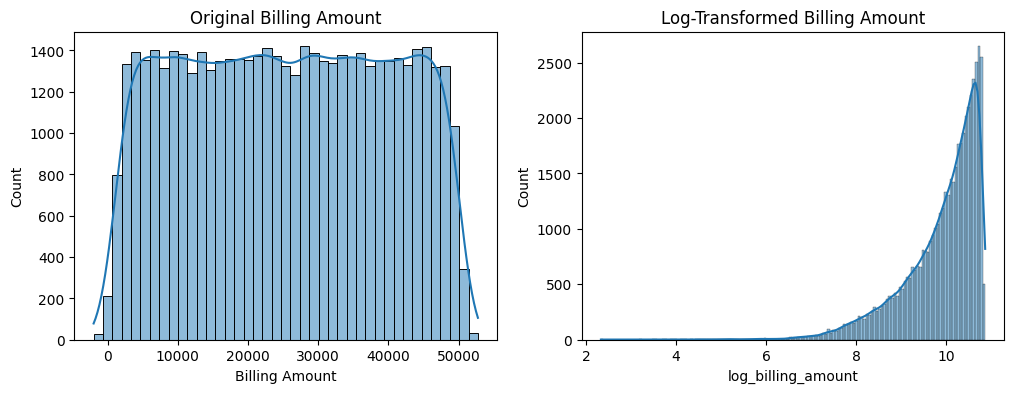

In [240]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.histplot(df["Billing Amount"], kde=True, ax=axes[0])
axes[0].set_title("Original Billing Amount")

sns.histplot(df["log_billing_amount"], kde=True, ax=axes[1])
axes[1].set_title("Log-Transformed Billing Amount")

plt.show()


In [241]:
df["Room Number"].nunique()


400

In [242]:
df.loc[
    df["Billing Amount"] > df["Billing Amount"].quantile(0.99),
    ["Age", "Medical Condition", "Admission Type", "Billing Amount"]
].head()


,Age,Medical Condition,Admission Type,Billing Amount
8,82,Asthma,Elective,50119.22
40,74,Hypertension,Emergency,49943.28
165,85,Cancer,Elective,50142.03
282,50,Diabetes,Elective,50254.20
323,30,Asthma,Emergency,51587.94


#### 2. Univariate Analysis – Categorical Variables
**Variables**: Gender, Blood Type, Medical Condition, Admission Type, Insurance Provider, Medication, Test Results  
**Objective**: Frequencies, imbalances.

**Checklist**:
- Frequency counts + proportions
- Top/bottom-5 categories
- Imbalance flags (<5%)
- Visuals: Horizontal bar charts, Count plots

**Log**: Common/rare categories.
**Pitfalls**: No pie charts; check rare clinical categories.

In [243]:
def categorical_summary(df, col):
    summary = (
        df[col]
        .value_counts(dropna=False)
        .to_frame()
    )
    summary["percentage"] = (summary["count"] / len(df)) * 100
    return summary


In [244]:
cat_cols = [
    "Gender",
    "Blood Type",
    "Medical Condition",
    "Admission Type",
    "Insurance Provider",
    "Medication",
    "Test Results"
]

cat_summaries = {col: categorical_summary(df, col) for col in cat_cols}


In [245]:
cat_summaries

{'Gender':         count  percentage
 Gender                   
 Female  25011      50.022
 Male    24989      49.978,
 'Blood Type':             count  percentage
 Blood Type                   
 AB+          6291      12.582
 B+           6278      12.556
 A-           6261      12.522
 AB-          6259      12.518
 A+           6246      12.492
 O+           6235      12.470
 B-           6230      12.460
 O-           6200      12.400,
 'Medical Condition':                    count  percentage
 Medical Condition                   
 Arthritis           8439      16.878
 Diabetes            8384      16.768
 Hypertension        8319      16.638
 Cancer              8294      16.588
 Obesity             8292      16.584
 Asthma              8272      16.544,
 'Admission Type':                 count  percentage
 Admission Type                   
 Elective        16827      33.654
 Urgent          16784      33.568
 Emergency       16389      32.778,
 'Insurance Provider':              

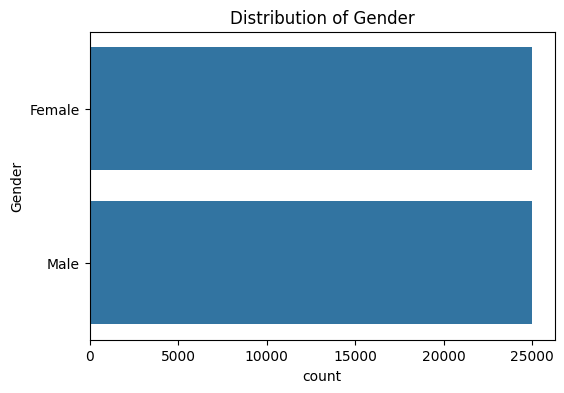

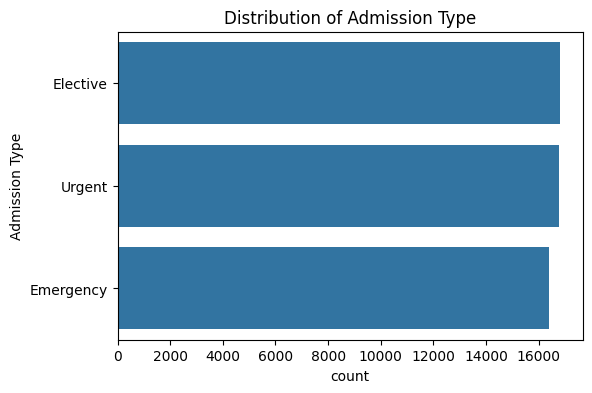

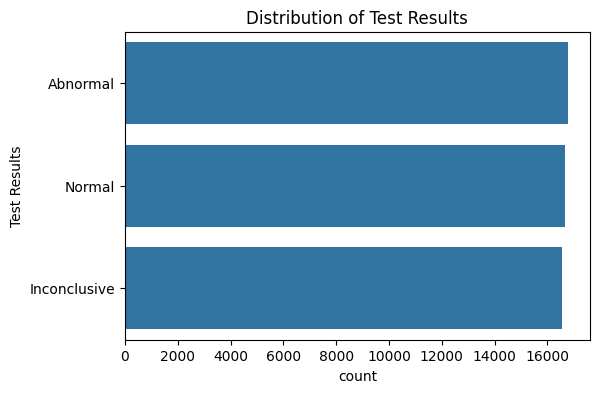

In [246]:

for col in ["Gender", "Admission Type", "Test Results"]:
    plt.figure(figsize=(6,4))
    sns.countplot(
        data=df,
        y=col,
        order=df[col].value_counts().index
    )
    plt.title(f"Distribution of {col}")
    plt.show()


#### 3. Temporal Analysis
**Derived**: Year, month, weekday from dates  
**Objective**: Trends/seasonality.

**Checklist**:
- Feature extraction (pd.to_datetime)
- Aggregations (counts/sums, normalized)
- Visuals: Line plots (over time), Boxplots (by period)

**Log**: Trends, seasonal spikes.
**Pitfalls**: Normalize volume; check partial years.

In [247]:
df['Admission Year'] =  df['Date of Admission'].dt.year
df['Admission Month'] =  df['Date of Admission'].dt.month_name()
df['Admission Weekday'] =  df['Date of Admission'].dt.day_name()

In [248]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length of Stay (days),log_billing_amount,Admission Year,Admission Month,Admission Weekday
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.28,328,Urgent,2024-02-02,Paracetamol,Normal,2,9.844654,2024,January,Wednesday
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6,10.423600,2019,August,Tuesday
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.10,205,Emergency,2022-10-07,Aspirin,Normal,15,10.238391,2022,September,Thursday
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78,450,Elective,2020-12-18,Ibuprofen,Abnormal,30,10.542991,2020,November,Wednesday
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,458,Urgent,2022-10-09,Penicillin,Abnormal,20,9.563762,2022,September,Monday


In [249]:
yearly_admissions = (
    df
    .groupby("Admission Year")
    .size()
)


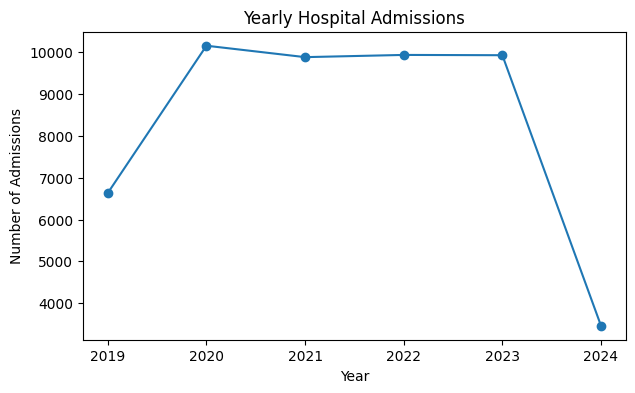

In [250]:
plt.figure(figsize=(7,4))
yearly_admissions.plot(marker="o")
plt.title("Yearly Hospital Admissions")
plt.ylabel("Number of Admissions")
plt.xlabel("Year")
plt.show()


In [251]:
monthly_admissions = (
    df
    .groupby(["Admission Year", "Admission Month"])
    .size()
    .reset_index(name="count")
)

monthly_avg = (
    monthly_admissions
    .groupby("Admission Month")["count"]
    .mean()
).reset_index()


In [252]:
monthly_avg

,Admission Month,count
0,April,812.800000
1,August,870.600000
2,December,843.800000
3,February,764.800000
4,January,848.800000
5,July,860.000000
6,June,845.800000
7,March,839.600000
8,May,690.833333
9,November,821.600000


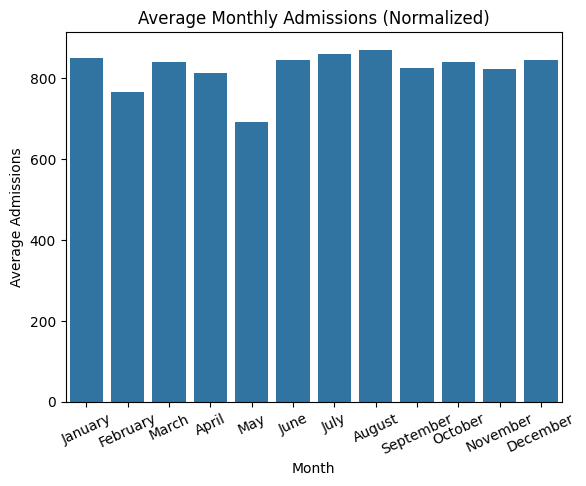

In [253]:
sns.barplot(
    data=monthly_avg,
    x='Admission Month',
    y='count',
    order=[
    'January', 'February', 'March', 'April', 
    'May', 'June', 'July', 'August', 
    'September', 'October', 'November', 'December'
]
)

plt.title("Average Monthly Admissions (Normalized)")
plt.xlabel("Month")
plt.xticks(rotation=25)
plt.ylabel("Average Admissions")
plt.show()


In [254]:
weekday_counts = (
    df["Admission Weekday"]
    .value_counts()
    .reindex([
        "Monday", "Tuesday", "Wednesday",
        "Thursday", "Friday", "Saturday", "Sunday"
    ])
)


In [255]:
weekday_counts.index

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'],
      dtype='object', name='Admission Weekday')

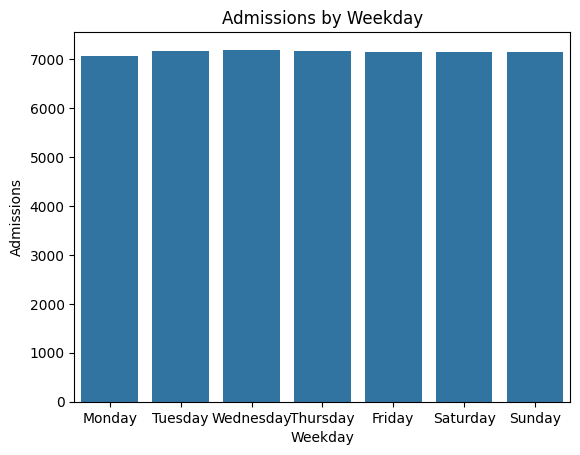

In [256]:
sns.barplot(
    x=weekday_counts.index,
    y=weekday_counts.values
)
plt.title("Admissions by Weekday")
plt.ylabel("Admissions")
plt.xlabel("Weekday")
plt.show()


In [257]:
yearly_cost = (
    df.groupby('Admission Year')['Billing Amount']
    .mean()

)

In [258]:
yearly_cost

Admission Year
2019    25706.958080
2020    25429.680393
2021    25636.397253
2022    25526.589902
2023    25584.849462
2024    25404.910173
Name: Billing Amount, dtype: float64

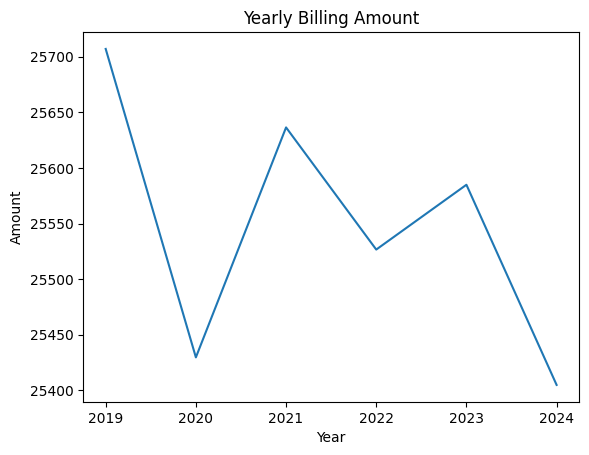

In [259]:
sns.lineplot(
    x=yearly_cost.index,
    y=yearly_cost.values
)

plt.title("Yearly Billing Amount")
plt.xlabel("Year")
plt.ylabel("Amount")

plt.show()


#### 4. Bivariate: Numerical vs Categorical
**Objective**: Category impacts on numerics.

**Checklist**:
- Grouped stats (mean/median)
- Tests: ANOVA/Kruskal-Wallis
- Visuals: Boxplots/violin, Bars + CI

**Log**: Key differences (e.g., Emergency costs).
**Pitfalls**: Check group sizes; no causation.

In [260]:
billing_by_admission = (
    df
    .groupby("Admission Type")["Billing Amount"]
    .agg(["count", "mean", "median"])
    .sort_values("mean", ascending=False)
)

billing_by_admission.reset_index()


,Admission Type,count,mean,median
0,Elective,16827,25618.775657,25650.830
1,Emergency,16389,25528.467867,25487.490
2,Urgent,16784,25519.028767,25530.985


In [261]:
los_by_condition = (
    df
    .groupby("Medical Condition")["Length of Stay (days)"]
    .agg(["count", "mean", "median"])
    .sort_values("mean", ascending=False)
).reset_index()

los_by_condition.head(10)


,Medical Condition,count,mean,median
0,Asthma,8272,15.665135,16.0
1,Arthritis,8439,15.555872,16.0
2,Cancer,8294,15.472149,15.0
3,Obesity,8292,15.456223,15.0
4,Hypertension,8319,15.446929,15.0
5,Diabetes,8384,15.407681,15.0


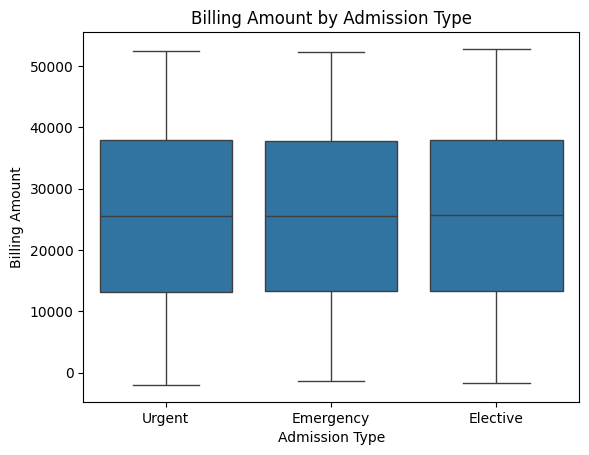

In [262]:
sns.boxplot(
    data=df,
    x="Admission Type",
    y="Billing Amount"
)
plt.title("Billing Amount by Admission Type")
plt.show()



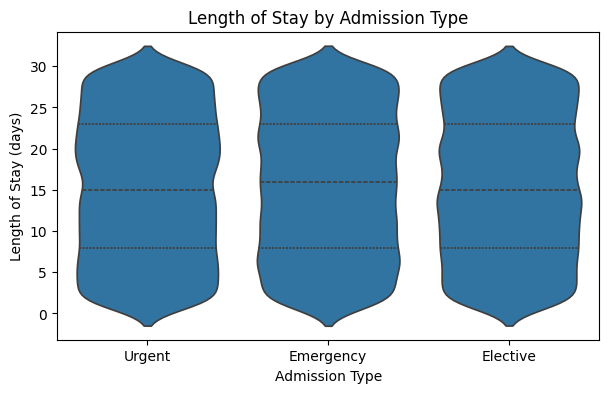

In [263]:
plt.figure(figsize=(7,4))
sns.violinplot(
    data=df,
    x="Admission Type",
    y="Length of Stay (days)",
    inner="quartile"
)
plt.title("Length of Stay by Admission Type")
plt.show()


In [264]:

groups = [
    df.loc[df["Admission Type"] == g, "Billing Amount"]
    for g in df["Admission Type"].unique()
]

f_stat, p_value = f_oneway(*groups)
f_stat, p_value


(np.float64(0.2515392317279671), np.float64(0.7776039343616595))

In [265]:

h_stat, p_value = kruskal(*groups)
h_stat, p_value


(np.float64(0.5152438903521613), np.float64(0.772887370680082))

C:\Users\acer\AppData\Local\Temp\ipykernel_15028\3829394741.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(


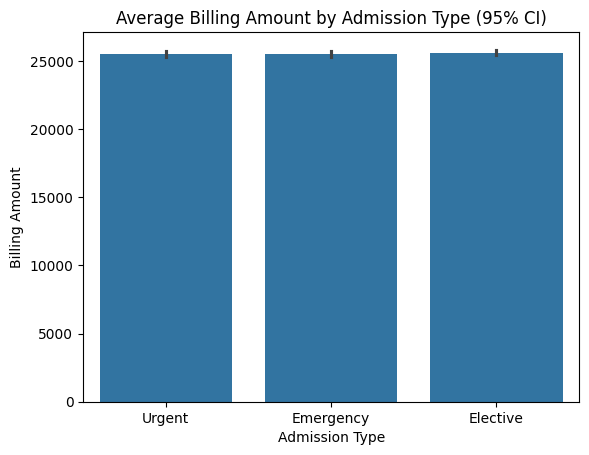

In [266]:
sns.barplot(
    data=df,
    x="Admission Type",
    y="Billing Amount",
    ci=95
)
plt.title("Average Billing Amount by Admission Type (95% CI)")
plt.show()


#### 5. Bivariate: Numerical vs Numerical
**Variables**: Age, Billing Amount, Room Number, Length of Stay  
**Objective**: Correlations.

**Checklist**:
- Pearson/Spearman matrices (p-values)
- Visuals: Scatter + trendlines, Heatmap

**Log**: Strongest pairs.
**Pitfalls**: Flag weak/non-linear; downsample scatters.

In [267]:
cleaned_df = df.copy()    

In [268]:
num_cols = ["Age", "Billing Amount", "Length of Stay (days)", "Room Number"]
num_df = cleaned_df[num_cols]


In [269]:
pearson_corr = num_df.corr(method="pearson")
pearson_corr


,Age,Billing Amount,Length of Stay (days),Room Number
Age,1.000000,-0.001009,0.007948,-0.000957
Billing Amount,-0.001009,1.000000,-0.004595,-0.003899
Length of Stay (days),0.007948,-0.004595,1.000000,-0.004652
Room Number,-0.000957,-0.003899,-0.004652,1.000000


In [270]:
spearman_corr = num_df.corr(method="spearman")
spearman_corr


,Age,Billing Amount,Length of Stay (days),Room Number
Age,1.000000,-0.000959,0.007947,-0.000935
Billing Amount,-0.000959,1.000000,-0.004555,-0.003877
Length of Stay (days),0.007947,-0.004555,1.000000,-0.004638
Room Number,-0.000935,-0.003877,-0.004638,1.000000


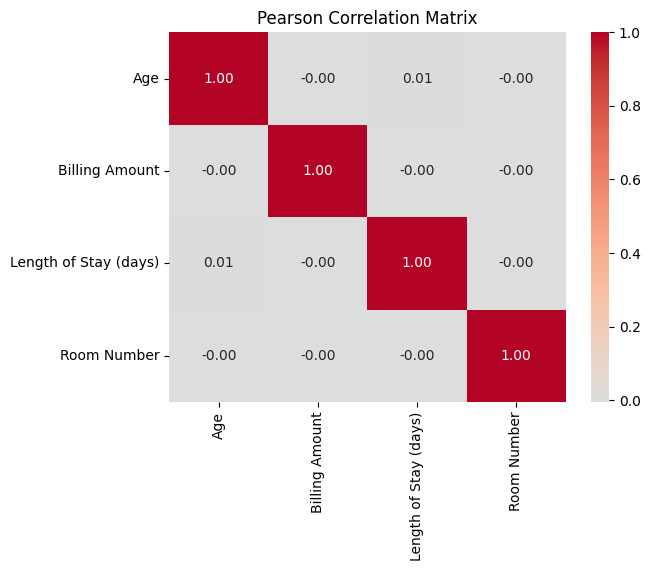

In [271]:
sns.heatmap(
    pearson_corr,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f"
)
plt.title("Pearson Correlation Matrix")
plt.show()


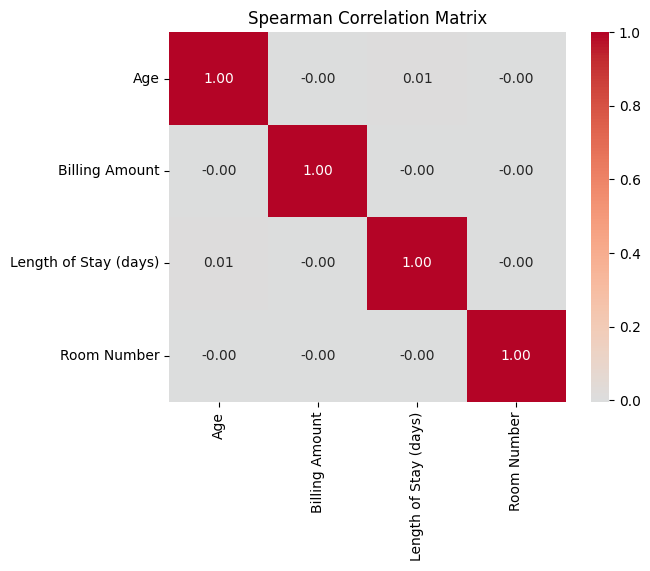

In [273]:
sns.heatmap(
    spearman_corr,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f"
)
plt.title("Spearman Correlation Matrix")
plt.show()


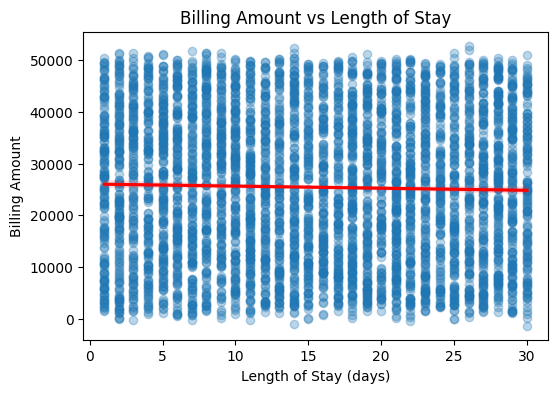

In [275]:
sample_df = cleaned_df.sample(5000, random_state=42)

plt.figure(figsize=(6,4))
sns.regplot(
    data=sample_df,
    x="Length of Stay (days)",
    y="Billing Amount",
    scatter_kws={"alpha": 0.3},
    line_kws={"color": "red"}
)
plt.title("Billing Amount vs Length of Stay")
plt.show()


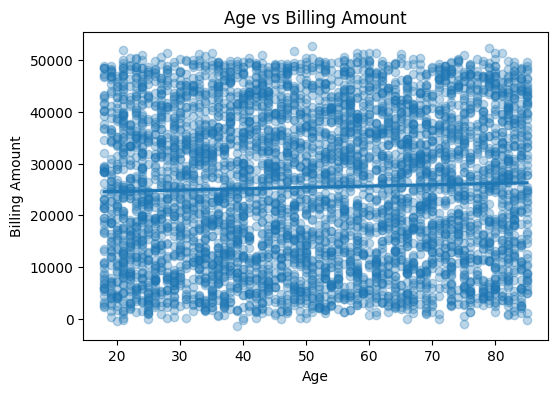

In [276]:
plt.figure(figsize=(6,4))
sns.regplot(
    data=sample_df,
    x="Age",
    y="Billing Amount",
    scatter_kws={"alpha": 0.3}
)
plt.title("Age vs Billing Amount")
plt.show()


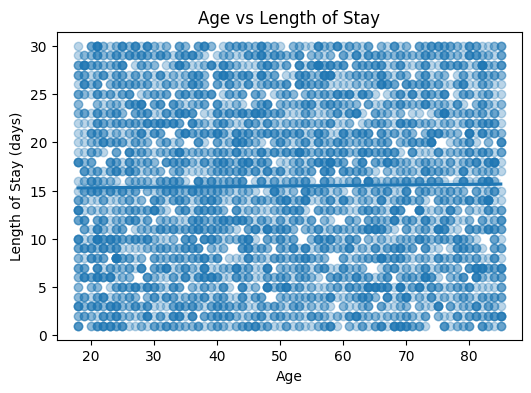

In [278]:
plt.figure(figsize=(6,4))
sns.regplot(
    data=sample_df,
    x="Age",
    y="Length of Stay (days)",
    scatter_kws={"alpha": 0.3}
)
plt.title("Age vs Length of Stay")
plt.show()


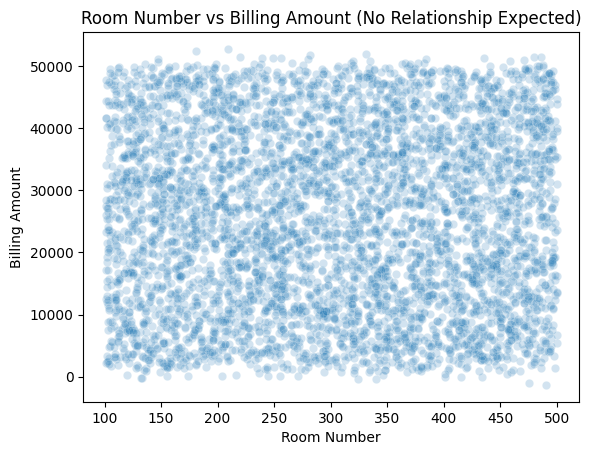

In [279]:
sns.scatterplot(
    data=sample_df,
    x="Room Number",
    y="Billing Amount",
    alpha=0.2
)
plt.title("Room Number vs Billing Amount (No Relationship Expected)")
plt.show()


#### 6. Multivariate Analysis
**Objective**: Interactions (max 3 vars).

**Checklist**:
- Pivot tables/grouped means
- Visuals: Faceted boxplots, Grouped heatmaps

**Log**: High-cost segments.
**Pitfalls**: Limit dimensions; prioritize clarity.

In [286]:
cleaned_df.rename(columns={'Length of Stay (days)':'length_of_stay'}, inplace=True)

In [280]:
pivot_cost = (
    cleaned_df
    .pivot_table(
        values="Billing Amount",
        index="Medical Condition",
        columns="Admission Type",
        aggfunc="mean"
    )
)

pivot_cost


Admission Type,Elective,Emergency,Urgent
Medical Condition,,,
Arthritis,25569.748969,25472.591704,25416.248431
Asthma,25309.170983,25979.308903,25768.907331
Cancer,25717.845335,24947.663693,25023.378988
Diabetes,25967.982369,25467.259867,25530.500692
Hypertension,25517.612292,25462.281197,25500.809503
Obesity,25638.462108,25834.133017,25876.602408


In [281]:
top_conditions = (
    cleaned_df["Medical Condition"]
    .value_counts()
    .head(10)
    .index
)

pivot_cost_top = pivot_cost.loc[top_conditions]
pivot_cost_top


Admission Type,Elective,Emergency,Urgent
Medical Condition,,,
Arthritis,25569.748969,25472.591704,25416.248431
Diabetes,25967.982369,25467.259867,25530.500692
Hypertension,25517.612292,25462.281197,25500.809503
Cancer,25717.845335,24947.663693,25023.378988
Obesity,25638.462108,25834.133017,25876.602408
Asthma,25309.170983,25979.308903,25768.907331


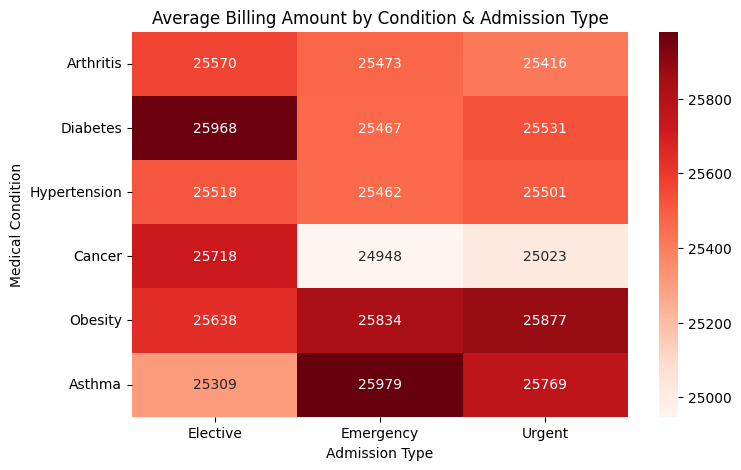

In [282]:
plt.figure(figsize=(8,5))
sns.heatmap(
    pivot_cost_top,
    annot=True,
    fmt=".0f",
    cmap="Reds"
)
plt.title("Average Billing Amount by Condition & Admission Type")
plt.show()


In [287]:
pivot_los = (
    cleaned_df
    .pivot_table(
        values="length_of_stay",
        index="Test Results",
        columns="Admission Type",
        aggfunc="mean"
    )
)

pivot_los


Admission Type,Elective,Emergency,Urgent
Test Results,,,
Abnormal,15.502110,15.627640,15.430615
Inconclusive,15.588288,15.478373,15.224991
Normal,15.460400,15.681186,15.517456


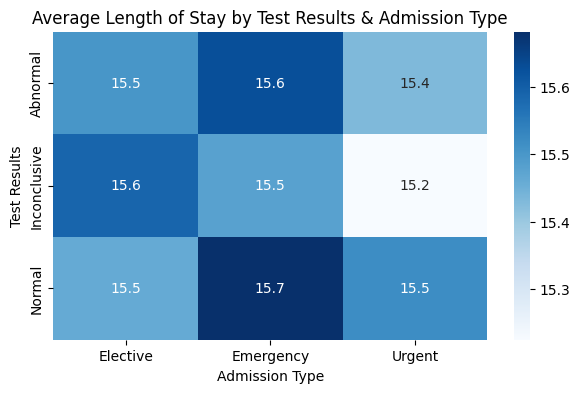

In [288]:
plt.figure(figsize=(7,4))
sns.heatmap(
    pivot_los,
    annot=True,
    fmt=".1f",
    cmap="Blues"
)
plt.title("Average Length of Stay by Test Results & Admission Type")
plt.show()


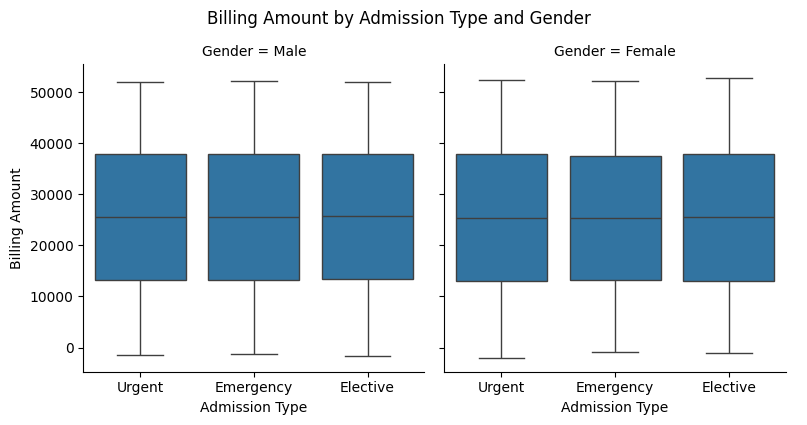

In [292]:
g = sns.catplot(
    data=cleaned_df,
    x="Admission Type",
    y="Billing Amount",
    col="Gender",
    kind="box",
    height=4,
    aspect=1
)

g.figure.suptitle("Billing Amount by Admission Type and Gender", y=1.05)
plt.show()


In [293]:
top_insurers = (
    cleaned_df["Insurance Provider"]
    .value_counts()
    .head(5)
    .index
)

insurance_subset = cleaned_df[
    cleaned_df["Insurance Provider"].isin(top_insurers)
]


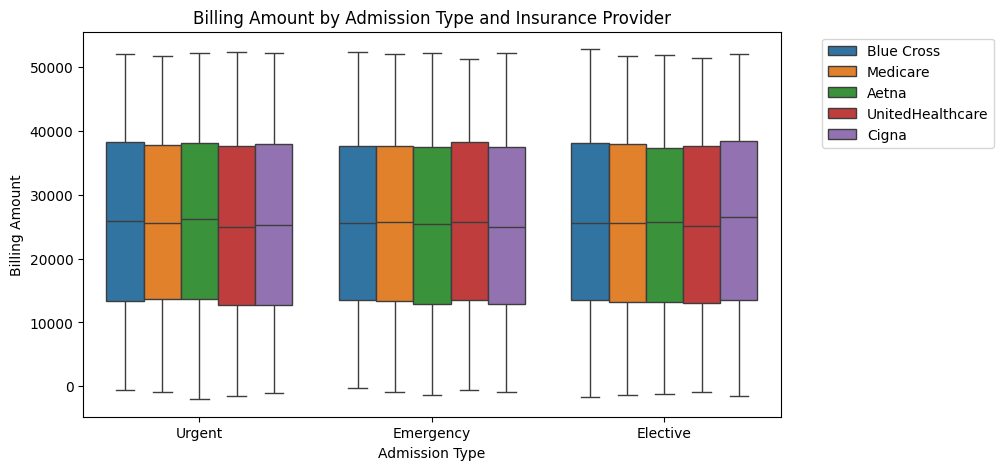

In [294]:
plt.figure(figsize=(9,5))
sns.boxplot(
    data=insurance_subset,
    x="Admission Type",
    y="Billing Amount",
    hue="Insurance Provider"
)
plt.title("Billing Amount by Admission Type and Insurance Provider")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()


In [295]:
high_cost_threshold = cleaned_df["Billing Amount"].quantile(0.95)

high_cost_segments = (
    cleaned_df[cleaned_df["Billing Amount"] >= high_cost_threshold]
    .groupby(["Medical Condition", "Admission Type"])
    .size()
    .sort_values(ascending=False)
    .head(10)
)

high_cost_segments


Medical Condition  Admission Type
Hypertension       Elective          164
Arthritis          Urgent            149
Hypertension       Urgent            149
Asthma             Emergency         147
Obesity            Elective          143
Diabetes           Urgent            142
Obesity            Emergency         142
Arthritis          Elective          141
Diabetes           Emergency         141
Asthma             Urgent            139
dtype: int64

#### 7. Target-Focused EDA
**Targets**: Billing Amount (regression); Admission Type/Test Results (classification)

**Regression Checklist**:
- Target distribution, heteroscedasticity
- Predictor-target boxplots

**Classification Checklist**:
- Imbalance metrics
- Feature separability

**Visuals**: Target plots, Pair plots (top features).
**Pitfalls**: No leakage; align w/ modeling.

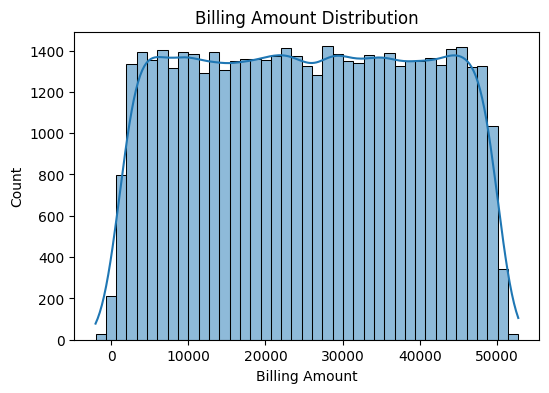

In [296]:
plt.figure(figsize=(6,4))
sns.histplot(cleaned_df["Billing Amount"], kde=True)
plt.title("Billing Amount Distribution")
plt.show()


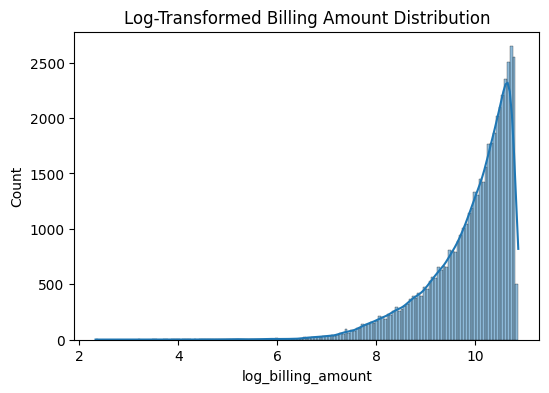

In [297]:
plt.figure(figsize=(6,4))
sns.histplot(cleaned_df["log_billing_amount"], kde=True)
plt.title("Log-Transformed Billing Amount Distribution")
plt.show()


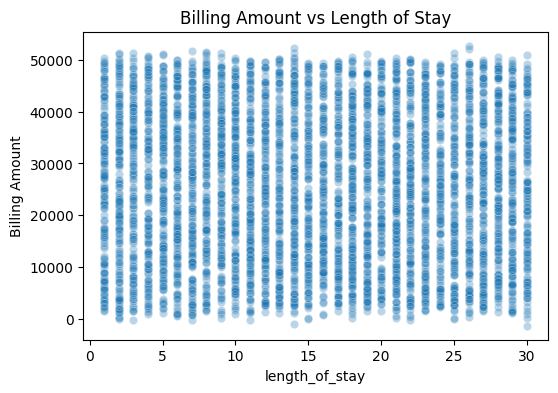

In [298]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=cleaned_df.sample(5000, random_state=42),
    x="length_of_stay",
    y="Billing Amount",
    alpha=0.3
)
plt.title("Billing Amount vs Length of Stay")
plt.show()


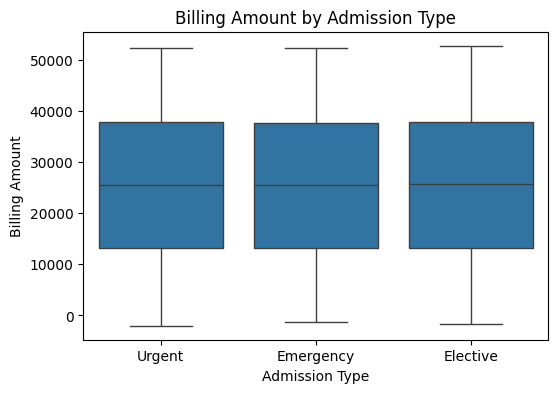

In [299]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=cleaned_df,
    x="Admission Type",
    y="Billing Amount"
)
plt.title("Billing Amount by Admission Type")
plt.show()


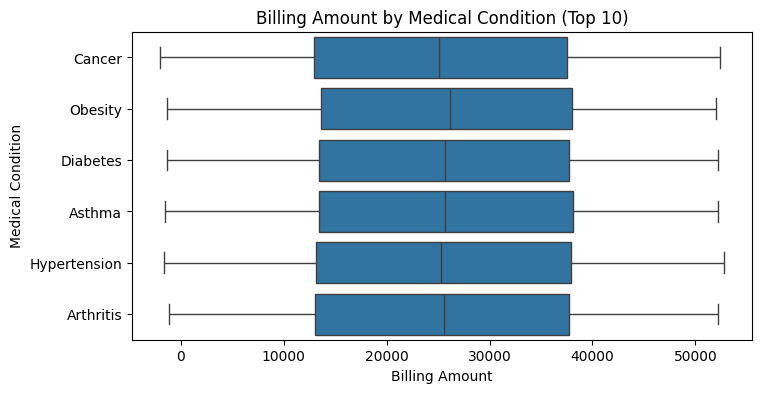

In [300]:
top_conditions = cleaned_df["Medical Condition"].value_counts().head(10).index

plt.figure(figsize=(8,4))
sns.boxplot(
    data=cleaned_df[cleaned_df["Medical Condition"].isin(top_conditions)],
    y="Medical Condition",
    x="Billing Amount"
)
plt.title("Billing Amount by Medical Condition (Top 10)")
plt.show()


In [301]:
def class_balance(df, target):
    balance = df[target].value_counts(normalize=True) * 100
    return balance.round(2)


In [302]:
class_balance(cleaned_df, "Admission Type")
class_balance(cleaned_df, "Test Results")


Test Results
Abnormal        33.54
Normal          33.37
Inconclusive    33.09
Name: proportion, dtype: float64

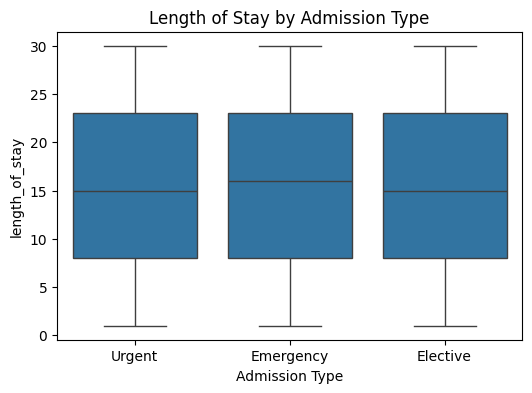

In [303]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=cleaned_df,
    x="Admission Type",
    y="length_of_stay"
)
plt.title("Length of Stay by Admission Type")
plt.show()


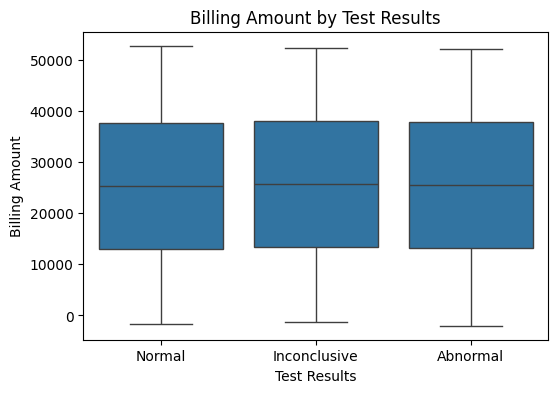

In [304]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=cleaned_df,
    x="Test Results",
    y="Billing Amount"
)
plt.title("Billing Amount by Test Results")
plt.show()


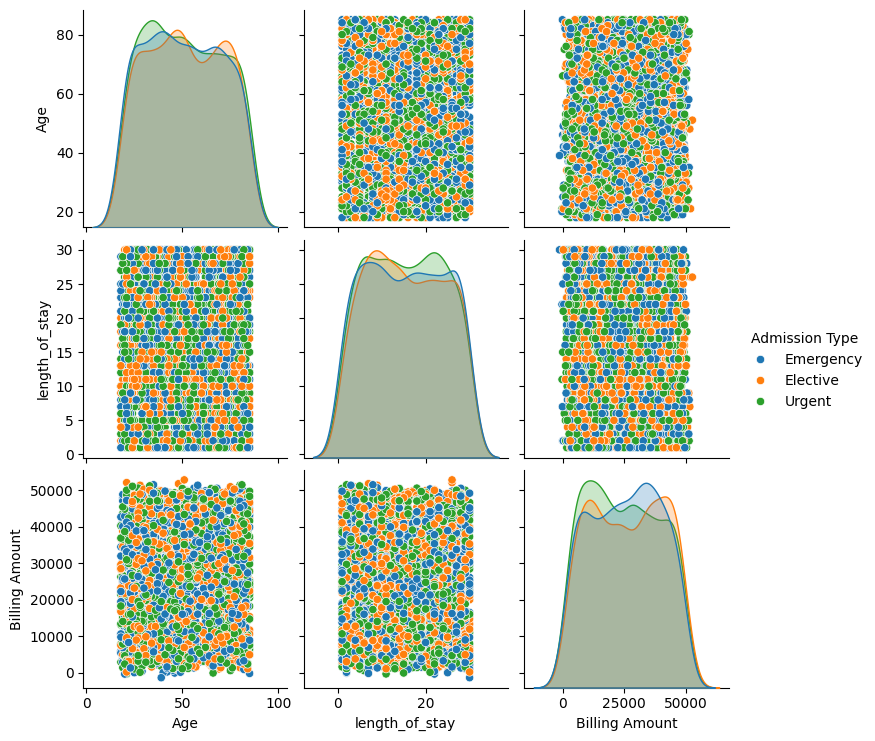

In [305]:
top_features = ["Age", "length_of_stay", "Billing Amount"]

sns.pairplot(
    cleaned_df.sample(3000, random_state=42),
    vars=top_features,
    hue="Admission Type"
)
plt.show()
